In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, os
from scipy.optimize import curve_fit

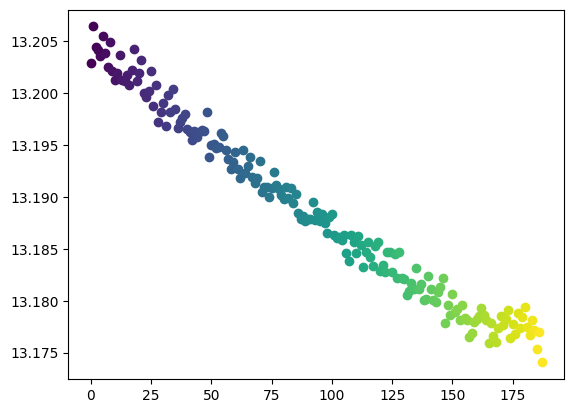

In [10]:
current_directory = os.getcwd()
files_list = [f for f in os.listdir(current_directory) if f.endswith('.dat')]

files_list.sort()
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x - cen) ** 2 / (2 * wid ** 2))

cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(files_list)))

for idx,file_path in enumerate(files_list):
    data_lines = []
    header_line = None
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#'):
                header_line = line[1:].strip()  # Strip the '#' and any surrounding whitespace
            else:
                data_lines.append(line.strip())
    with open('cleaned_data.txt', 'w') as temp_file:
        temp_file.write(header_line + '\n')
        temp_file.write('\n'.join(data_lines))

    df = pd.read_csv('cleaned_data.txt', sep='\s+')
    #plt.plot(df['q_nm^-1'], idx*0.1+df['I'], color = colors[idx], lw = 0.5)
    

    mask = (df['q_nm^-1'] >= 13.15) & (df['q_nm^-1'] <= 13.225)
    q_data = df.loc[mask, 'q_nm^-1']
    I_data = df.loc[mask, 'I']

    initial_guess = [I_data.max(), q_data.mean(), 0.1]
    popt, pcov = curve_fit(gaussian, q_data, I_data, p0=initial_guess)

    amp, cen, wid= popt
    max_intensity = amp
    max_intensity_q_value = cen

    #plt.scatter(max_intensity_q_value, idx*0.1+max_intensity,color = colors[idx] )

    plt.scatter(idx, max_intensity_q_value,color = colors[idx])
    #plt.scatter(idx, wid,color = colors[idx])

#plt.ylim([2.5,3.5])
#plt.xlim([12.75,13.5])